In [19]:
!unzip "/content/drive/MyDrive/Sentiment_Analysis/aclImdb_v1_tar.zip" -d "/content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/train/unsup/5504_0.txt  
  inflating: /content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/train/unsup/5505_0.txt  
  inflating: /content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/train/unsup/5506_0.txt  
  inflating: /content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/train/unsup/5507_0.txt  
  inflating: /content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/train/unsup/5508_0.txt  
  inflating: /content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/train/unsup/5509_0.txt  
  inflating: /content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/train/unsup/550_0.txt  
  inflating: /content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/train/unsup/5510_0.txt  
  inflating: /content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/train/unsup/

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy
import json


In [24]:
df = pd.DataFrame(columns=["ReviewId", "Rating" , "LReview", "Review", "MovieID", "Name"])

positive_files = glob.glob("/content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/test/pos/*")
print(len(positive_files))

negative_files = glob.glob("/content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/test/neg/*")
print(len(negative_files))

Mnames = pd.read_json("/content/TestMovieDetails.json")

movies_neg = []
movies_pos = []

n = 0

try:
    fp = open('/content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/test/urls_pos.txt')
    while(n<200):
        movies_pos.append(fp.readline()[26:35])
        n+=1
finally:
    fp.close()

n = 0

try:
    fp = open('/content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/test/urls_neg.txt')
    while(n<200):
        movies_neg.append(fp.readline()[26:35])
        n+=1
finally:
    fp.close()

12500
12500


In [4]:
import os
import json

# === Provide your movie URLs here ===
movies_pos = [
    "http://www.imdb.com/title/tt0406816/usercomments",
    "http://www.imdb.com/title/tt0111161/usercomments",
    "http://www.imdb.com/title/tt0068646/usercomments",
    "http://www.imdb.com/title/tt0468569/usercomments",
    "http://www.imdb.com/title/tt0071562/usercomments"
]

movies_neg = [
    "http://www.imdb.com/title/tt0406816/usercomments",
    "http://www.imdb.com/title/tt0111161/usercomments",
    "http://www.imdb.com/title/tt0068646/usercomments",
    "http://www.imdb.com/title/tt0468569/usercomments",
    "http://www.imdb.com/title/tt0071562/usercomments"
]

# === Directories of reviews ===
pos_dir = "/content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/test/pos"
neg_dir = "/content/drive/MyDrive/Sentiment-Analysis/aclIMDB-tar/aclImdb_v1_tar/test/neg"

def extract_imdb_id(url):
    # Extract the part like 'tt0406816' from the URL
    parts = url.split("/")
    for part in parts:
        if part.startswith("tt"):
            return part
    return None

def process_files(folder, sentiment, movies_list):
    data = []
    files = os.listdir(folder)

    for n, fname in enumerate(files):
        fpath = os.path.join(folder, fname)

        # review_id = filename without extension
        review_id = os.path.splitext(fname)[0]

        # rating comes from filename like "123_9.txt"
        try:
            rating = int(fname.split("_")[1].split(".")[0])
        except:
            rating = None  # if parsing fails

        # read review text
        with open(fpath, encoding="utf-8") as f:
            review_text = f.read().strip()

        # map movie_id from list (wrap around if more files than URLs)
        movie_url = movies_list[n % len(movies_list)]
        movie_id = extract_imdb_id(movie_url)

        data.append({
            "ReviewID": review_id,
            "Sentiment": sentiment,
            "Rating": rating,
            "MovieID": movie_id,
            "ReviewText": review_text
        })

    return data

# Process both positive and negative reviews
pos_data = process_files(pos_dir, "positive", movies_pos)
neg_data = process_files(neg_dir, "negative", movies_neg)

# Combine
all_data = pos_data + neg_data

# Save to JSON
with open("reviews_dataset.json", "w", encoding="utf-8") as f:
    json.dump(all_data, f, indent=4, ensure_ascii=False)

print(f"Saved {len(all_data)} reviews into reviews_dataset.json")


Saved 25000 reviews into reviews_dataset.json


In [5]:
import pandas as pd
import os
import json

# Load your JSON file (the one you created earlier)
with open("reviews_dataset.json", "r", encoding="utf-8") as f:
    reviews = json.load(f)

# Convert JSON list into DataFrame
df = pd.DataFrame(reviews)

# Add length of review text
df["LReview"] = df["ReviewText"].apply(len)

# Ensure numeric types
df["Rating"] = pd.to_numeric(df["Rating"])
df["ReviewId"] = df.index  # unique ID for each row

# Sort by rating if you like
df.sort_values(by=["Rating"], inplace=True)

# Reorder columns nicely
df = df[["ReviewId", "Sentiment", "Rating", "MovieID", "ReviewText", "LReview"]]

df.head()


,ReviewId,Sentiment,Rating,MovieID,ReviewText,LReview
24993,24993,negative,1,tt0468569,"The screenplay is the worst part of this film,...",2844
20862,20862,negative,1,tt0068646,The gates of Hell opened up and spit out this ...,687
20859,20859,negative,1,tt0071562,I tried. God knows I tried to like this Swiss ...,1132
12582,12582,negative,1,tt0068646,The first time I saw this was when I was with ...,3588
12581,12581,negative,1,tt0111161,The good things first: I agree with another vi...,860


In [6]:
df.dtypes

,0
ReviewId,int64
Sentiment,object
Rating,int64
MovieID,object
ReviewText,object
LReview,int64


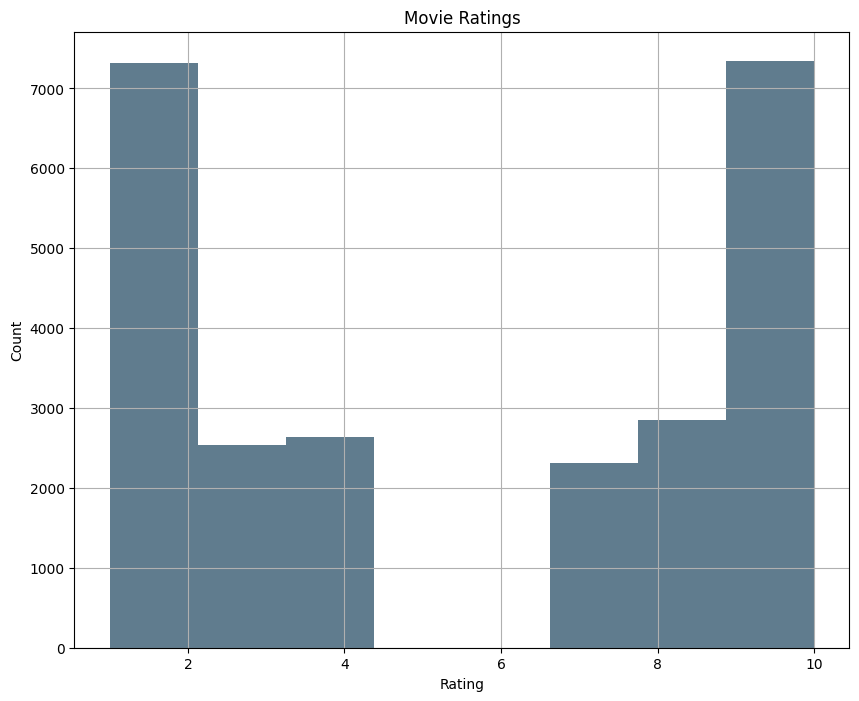

In [8]:
import matplotlib.pyplot as plt

df["Rating"].plot.hist(
    grid=True,
    bins=len(df["Rating"].unique()),
    figsize=(10, 8),
    color='#607c8e'
)
plt.title('Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


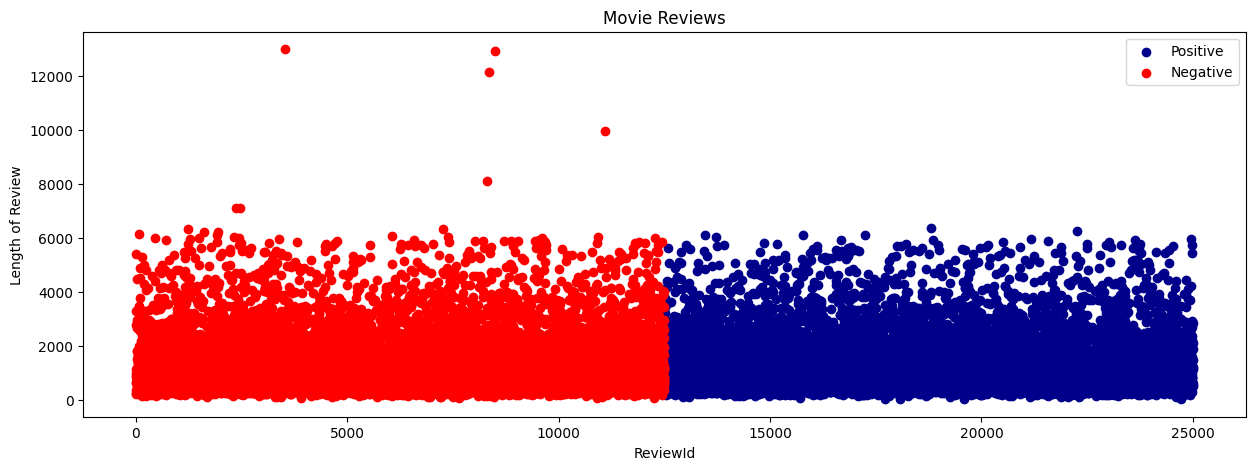

In [9]:
plt.figure(figsize=(15,5))
dfp = df[df["Rating"]<5]
dfn = df[df["Rating"]>5]

plt.title('Movie Reviews')
plt.xlabel('ReviewId')
plt.ylabel('Length of Review')
plt.scatter(x=dfp["ReviewId"], y=dfp["LReview"], c='DarkBlue', label='Positive' )
plt.scatter(x=dfn["ReviewId"], y=dfn["LReview"], c='Red', label='Negative' )
plt.legend(loc="best")
plt.show()

In [48]:
a = 'tt0468569'
tdf = df[df["MovieID"] == a]
tdf



,ReviewId,Sentiment,Rating,MovieID,ReviewText,LReview
24993,24993,negative,1,tt0468569,"The screenplay is the worst part of this film,...",2844
16923,16923,negative,1,tt0468569,Not just the money we paid to rent it or actua...,886
24958,24958,negative,1,tt0468569,This is possibly the hands down worst movie ev...,1190
24928,24928,negative,1,tt0468569,Closet Land is a nasty piece of work with supe...,1116
24918,24918,negative,1,tt0468569,"Well, what can be said about a ""horror comedy""...",720
...,...,...,...,...,...,...
73,73,positive,10,tt0468569,I´ve been able to see this great movie at the ...,1001
38,38,positive,10,tt0468569,""" I have wrestled with death. It is the most u...",2924
53,53,positive,10,tt0468569,"I thought this movie was good, I loved the plo...",655
12478,12478,positive,10,tt0468569,This is a well done action movie. There are pl...,929


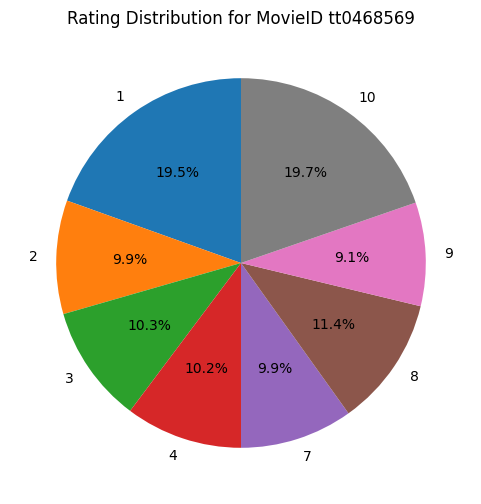

In [54]:
counts = tdf["Rating_numeric"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title(f'Rating Distribution for MovieID {a}')
plt.show()

In [55]:
bar = pd.DataFrame({"Positive":[0],
                    "Negative":[0]})
bar

,Positive,Negative
0,0,0


In [76]:
import pandas as pd

tdf["Rating_numeric"] = pd.to_numeric(tdf["Rating"], errors='coerce')

positive_count = (tdf["Rating_numeric"] >= 5).sum()
negative_count = (tdf["Rating_numeric"] < 5).sum()

# Create DataFrame
bar_df = pd.DataFrame({
    "Positive": [positive_count],
    "Negative": [negative_count]
})

bar_df


,Positive,Negative
0,2500,2500


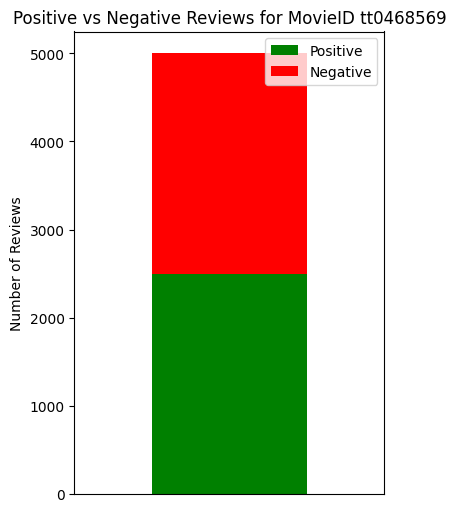

In [77]:
tdf = df[df["MovieID"] == a].copy()

tdf["Rating_numeric"] = pd.to_numeric(tdf["Rating"], errors='coerce')

positive_count = (tdf["Rating_numeric"] >= 5).sum()
negative_count = (tdf["Rating_numeric"] < 5).sum()

bar_df = pd.DataFrame({
    "Positive": [positive_count],
    "Negative": [negative_count]
})

# Plot stacked vertical bar chart
bar_df.plot(kind='bar', stacked=True, color=['green','red'], figsize=(4,6))
plt.ylabel("Number of Reviews")
plt.title(f"Positive vs Negative Reviews for MovieID {a}")
plt.xticks([])
plt.show()


<Axes: ylabel='count'>

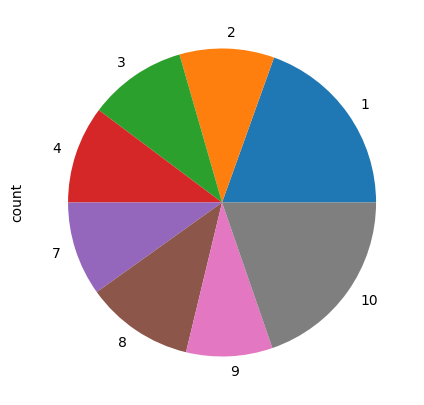

In [78]:
counts.plot.pie(y='Rating', figsize=(5, 5))

In [82]:
import pandas as pd
df["Rating_numeric"] = pd.to_numeric(df["Rating"], errors='coerce')

mean_ratings = df_clean.groupby("MovieID")["Rating_numeric"].mean()

print(mean_ratings)
print("Number of MovieIDs:", len(mean_ratings))


MovieID
tt0068646    5.5282
tt0071562    5.5186
tt0111161    5.4948
tt0406816    5.5248
tt0468569    5.4984
Name: Rating_numeric, dtype: float64
Number of MovieIDs: 5
